In [1]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
# from scipy.io import loadmat 
# mnist = loadmat('..//..//MachineLearning Training//mnist-original.mat')
# mnist
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [4]:
X, y = mnist["data"], mnist["target"]
y.shape

(70000,)

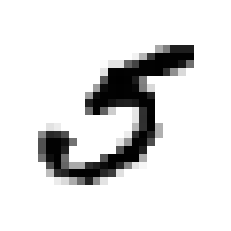

In [5]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

In [7]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    print(len(images))
#     images.append(np.zeros((size, size * n_empty)))
#     print(images[100])
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

100


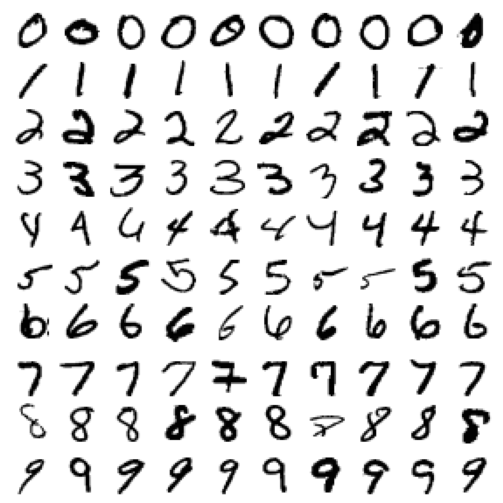

In [8]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [9]:
X_train, X_test,y_train,y_test=X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [10]:
y_train_5 = (y_train ==5)
y_test_5=(y_test==5)

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
#1.
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty,random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_clf.predict([some_digit])

array([ True])

fit untuk melatih machine X_train , yang memiliki hasil y_train. supaya machine dapat memprediksi jika memiliki sebuah data X maka data y apa yang dimiliki

param_1 -> X_train   , karena X merupakan data yang akan digunakan untuk memprediksi y

param_2 -> y_train_5 , untuk melatih machine sehingga menjadi tau jika terdapat sebuah X data maka y apa yang dimiliki

In [11]:
from sklearn.model_selection import cross_val_score
sgd_val_score = cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")
print(sgd_val_score)

[0.96225 0.9645  0.94765]


cross_val_score ()

param 1 -> sgd_clf, memberi tahu program metode apa yang akan digunakan dalam meprediksi

param 2-> X_train, data X_train yang akan digunakan dalam pengujian nya

param 3-> y_train_5 , menjadi perbandingan kebenaran dalam hasil prediksi X_train

param 4 -> cv=3,fold sebanyak 3x

In [12]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [13]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_5,y_pred)
conf_matrix

array([[53417,  1162],
       [ 1350,  4071]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score
prec_score = precision_score(y_train_5,y_pred)
recall_scores = recall_score(y_train_5,y_pred)
print(prec_score,recall_score)

0.7779476399770686 <function recall_score at 0x000001D2E7069E50>


"Now your 5-detector does not look as shiny as it did when you looked at its accuracy. When it claims an image represents a 5, it is correct only 77% of the time. Moreover, it only detects 79% of the 5s."

In [15]:
from sklearn.metrics import f1_score
f1_scoree = f1_score(y_train_5,y_pred
                    )
print(f1_scoree)

0.7642200112633752


As a result, the classifier will only get a high F1 score if both recall and precision are high.

In [16]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions , recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

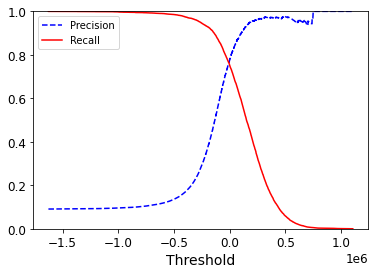

In [17]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="upper left")
 plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [18]:
y_train_pred_90= (y_scores >70000)

prec_score = precision_score(y_train_5, y_train_pred_90)
recall = recall_score(y_train_5, y_train_pred_90)

print(prec_score , recall)

0.8712083540527101 0.6463752075262866


In [19]:
from sklearn.metrics import roc_curve

fpr , tpr, thresholds = roc_curve(y_train_5,y_scores)

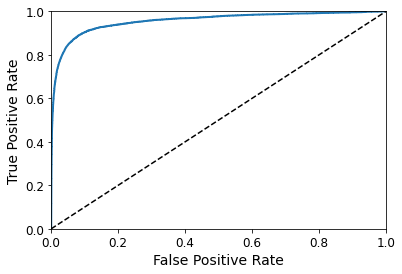

In [20]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9562435587387078

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [23]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5, cv=3,
                                    method="predict_proba")

In [24]:
print(y_probas_forest[36000])

[1. 0.]


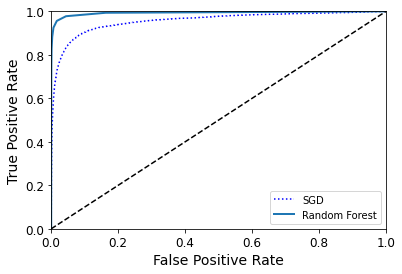

In [25]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


In [26]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [27]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9852973447443494

In [28]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

## Multiclass Classification
Multiclass classifcation berarti mengidentifikasi sebuah data X yang nilai y nya lebih dari 1 kemungkinan (misal mengidentifikasi gambar tersebut merupakan 0/1/2/3/4/5/6/7/8/9) sedangkan Binary classification hanya menentukan 2 kemungkinan (misal , suatu gambar 5 / bukan 5 , bisa juga 1 / 2) yang diamana hanya ada 2 kemungkinan

In [30]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

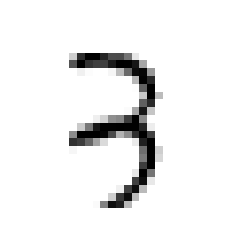

array([3], dtype=int8)

In [36]:
plot_digit(X[23000])
sgd_clf.predict([X[23000]])

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X[23000]])

array([3], dtype=int8)

In [42]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [44]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [46]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.8618, 0.8675, 0.8389])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9091 , 0.90955, 0.9062 ])

## Error Analysis
Part ini saya skip

In [53]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5728,    3,   18,   10,   11,   48,   54,   10,   38,    3],
       [   2, 6472,   43,   27,    6,   41,    6,    9,  124,   12],
       [  59,   39, 5300,  103,   96,   24,   99,   57,  167,   14],
       [  60,   42,  133, 5357,    4,  213,   35,   52,  135,  100],
       [  14,   28,   33,    9, 5366,    8,   56,   33,   88,  207],
       [  68,   49,   30,  197,   76, 4566,  118,   33,  190,   94],
       [  35,   28,   31,    1,   47,   86, 5639,    9,   42,    0],
       [  22,   20,   70,   29,   65,   11,    6, 5789,   18,  235],
       [  55,  158,   63,  157,   11,  155,   61,   24, 5022,  145],
       [  38,   37,   30,   85,  185,   24,    2,  216,   74, 5258]],
      dtype=int64)

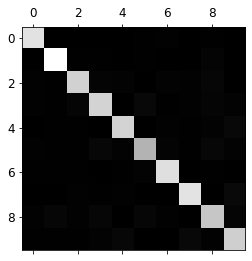

In [54]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [60]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
print(conf_mx.shape,row_sums.shape)
#

(10, 10) (10, 1)


## Multilabel Classification
Multilabel seperti genre film , misal ada film A,B,C .
Film A : Action,Fantasy
Film B : Action,Thriller
Film C : Action , Adventure , Scifi

seperti diatas , setiap Film memiliki lebih dari 1 , dan tidak eksklusif terhadap 1 label itu saja , bukan berarti suatu Film sudah di label Action tidak bisa dilabel Thriller dll